In [1]:
import os
import numpy as np
import pandas as pd
import time
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import minimize, fmin, fminbound, fmin_slsqp, brute

In [2]:
injected_sigs = np.loadtxt("../../Training/simulation/injection/injection.txt", dtype=str, delimiter=",")
periods_inj = injected_sigs[:, 3].astype("float64")
SNR = np.loadtxt("../Data/SNR_10000_corrected.txt")[:10000]

In [20]:
values = np.core.defchararray.add(injected_sigs[:,0], "-")
values = np.core.defchararray.add(values, injected_sigs[:, 1])
values = np.core.defchararray.add(values, "_inj.blsanal")
values
print values[1]

10000198-1_inj.blsanal


In [21]:
periods_bls = np.zeros(10000)
for i, name in enumerate(values[:10000]):
    print name
    periods_bls[i]=(np.loadtxt("../../Training/simulation/injection/" + name)[0,1])
    if i % 1000 ==999:
        print i
#plt.hist(periods)

10000198-0_inj.blsanal
10000198-1_inj.blsanal
10000198-2_inj.blsanal
10000198-3_inj.blsanal
10000198-4_inj.blsanal
10000198-5_inj.blsanal
10000198-6_inj.blsanal
10000198-7_inj.blsanal
10000198-8_inj.blsanal
10000198-9_inj.blsanal
10000198-10_inj.blsanal
10000198-11_inj.blsanal
10000198-12_inj.blsanal
10000198-13_inj.blsanal
10000198-14_inj.blsanal
10000198-15_inj.blsanal
10000198-16_inj.blsanal
10000198-17_inj.blsanal
10002203-0_inj.blsanal
10002203-1_inj.blsanal
10002203-2_inj.blsanal
10002203-3_inj.blsanal
10002203-4_inj.blsanal
10002203-5_inj.blsanal
10002203-6_inj.blsanal
10002203-7_inj.blsanal
10002203-8_inj.blsanal
10002203-9_inj.blsanal
10002203-10_inj.blsanal
10002203-11_inj.blsanal
10002203-12_inj.blsanal
10002203-13_inj.blsanal
10002203-14_inj.blsanal
10002203-15_inj.blsanal
10002203-16_inj.blsanal
10002203-17_inj.blsanal
10002203-18_inj.blsanal
10002349-0_inj.blsanal
10002349-1_inj.blsanal
10002349-2_inj.blsanal
10002349-3_inj.blsanal
10002349-4_inj.blsanal
10002349-5_inj.bl

In [22]:
harmonics = np.loadtxt("../Data/period_harmonics_10000_inj_signals.txt")

In [23]:
def period_func(vals, p_bls, p_inj):
    a, b = vals
    a = np.rint(a)
    b = np.rint(b)
    #print a, b
    #print a*p_bls-b*p_inj
    
    return np.abs((a*p_bls - b*p_inj) / 0.5/(a*p_bls + b*p_inj))

In [24]:
rranges = (slice(1,5, 1), slice(1,5, 1))
harmonics = np.empty(shape = [10000,2])
print len(periods_bls), len(periods_inj) #periods_inj.shape, periods_bls.shape
for i in range(10000):
    #periods_bls[0]
    #initial = [1,1, periods_bls[i], periods_inj[i]]
    #res = minimize(period_func, initial)
    #results = fmin(period_func, np.array([1, 1]), args=(periods_bls[i], periods_inj[i]), xtol=0.9)
    #print results
    #print "\n", periods_bls[i], periods_inj[i]
    results = brute(period_func, ranges=rranges, args=(periods_bls[i], periods_inj[i]), full_output=True, finish= None)
    #print results[0]
    harmonics[i, :] =results[0]
    try:
        results[0].astype(int)
    except:
        print i
    #break
print harmonics.shape

10000 195963
(10000, 2)


1846
True 1425


(array([  9.21500000e+03,   3.89000000e+02,   4.10000000e+01,
          5.30000000e+01,   5.40000000e+01,   3.80000000e+01,
          2.40000000e+01,   3.60000000e+01,   2.00000000e+01,
          3.30000000e+01,   2.00000000e+01,   2.30000000e+01,
          2.00000000e+01,   2.30000000e+01,   9.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]),
 array([ 0.        ,  0.10526316,  0.21052632,  0.31578947,  0.42105263,
         0.52631579,  0.63157895,  0.73684211,  0.84210526,  0.94736842,
         1.05263158,  1.15789474,  1.26315789,  1.36842105,  1.47368421,
         1.57894737,  1.68421053,  1.78947368,  1.89473684,  2.        ]),
 <a list of 19 Patch objects>)

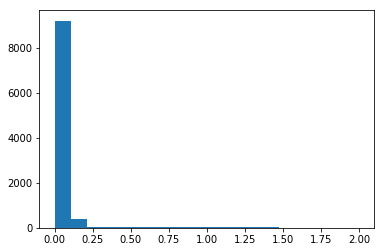

In [25]:
tol = np.zeros(10000)
for i in range(10000):
    tol[i] = period_func( harmonics[i], periods_bls[i], periods_inj[i])
    #break
#print type(periods_bls)
#print type(periods_inj)
#print harmonics[tol>2][0], np.array(periods_bls)[tol>2][0], periods_inj[tol>2][0], tol[tol>2][0]
print len(np.where(tol>0.002)[0])
print "True", len((np.where( ((harmonics[:,0]==1) + (harmonics[:,1]==1)  
                                    + (harmonics[:,1] == harmonics[:,0])) * (tol>0.002) ) [0]))
#print "T"
plt.hist(tol, bins = np.linspace(0,2,20))

In [26]:
print harmonics.shape, tol.shape
tot_vals = np.hstack([harmonics, tol.reshape(10000,1)])
print tot_vals.shape

(10000, 2) (10000,)
(10000, 3)


In [13]:
np.savetxt("../Data/period_harmonics_10000_inj_signals_tol_5x5.txt",tot_vals)

In [27]:
harmonics = np.rint(harmonics)
print harmonics[SNR<6]

[[ 1.  4.]
 [ 2.  1.]
 [ 3.  2.]
 ..., 
 [ 4.  1.]
 [ 4.  1.]
 [ 4.  1.]]


In [28]:
koi_feats=  pd.read_csv("../Data/KOI_feat_files_4251_fixed_ordered.csv", index_col=0)
koi_feats.head()

,mod_sig_pri_dv,mod_sig_sec_dv,mod_sig_ter_dv,mod_sig_pos_dv,mod_fa1_dv,mod_fa2_dv,mod_fred_dv,modshiftval1_dv,modshiftval2_dv,modshiftval3_dv,...,BLS_i2_1_0,BLS_deltaChi2_1_0,BLS_fraconenight_1_0,BLS_Npointsintransit_1_0,BLS_Ntransits_1_0,BLS_Npointsbeforetransit_1_0,BLS_Npointsaftertransit_1_0,BLS_Rednoise_1_0,BLS_Whitenoise_1_0,BLS_SignaltoPinknoise_1_0
0,0.00019,-9.996800,0.003284,-0.001845,3.208791,2.786274,0.987067,-3.208598,-2.789368,-2.784239,...,0.13630,-0.0,0.44300,81.0,4.0,82.0,58.0,0.00011,0.00022,3.17685
1,0.00019,-9.989691,0.011156,-0.004423,3.197128,2.865455,0.908740,-3.196919,-2.876421,-2.860842,...,0.35661,-0.0,0.37482,53.0,3.0,46.0,57.0,0.00003,0.00016,6.74216
2,0.00022,-9.990673,0.009665,-0.009116,3.092935,2.750766,0.890656,-3.092688,-2.760211,-2.741429,...,1.05234,-0.0,0.53792,78.0,3.0,67.0,80.0,0.00007,0.00023,4.80459
3,0.00055,-9.988610,0.010345,-0.008990,3.257781,3.055649,0.393282,-3.256383,-3.065444,-3.046109,...,0.88239,-0.0,0.94416,44.0,2.0,45.0,27.0,0.00005,0.00018,12.26376
4,0.00028,-9.980326,0.017231,-0.018093,3.188087,2.855529,0.320422,-3.187213,-2.872480,-2.837156,...,0.61009,-0.0,0.74023,73.0,3.0,83.0,49.0,0.00004,0.00019,8.70123


In [29]:
file_name = '../../Training/catalogs/shortperiodbright_KOI.csv'
koi = pd.read_csv(file_name)
#print koi.columns.values
file_list = os.listdir("../KOI_ModShiftVals/.")

file_list = [x for x in file_list if "fixed" in x] 
star_name = koi["kepid"]
periods = koi["koi_period"]
data  = np.loadtxt(file_name, dtype = str, delimiter=",")#.reshape(data.shape[0], 5)
inds = np.where(koi["koi_model_snr"]==np.nan)[0]
koi["koi_model_snr"][inds]==1000.

koi_info = np.loadtxt("../Data/SNR_feats_KOIS_4251.txt")

values = np.core.defchararray.add(koi_info[:,0].astype(str), "-")
values1 = np.core.defchararray.add(koi_info[:,1].astype(str), "_prim_feats_fixed.txt")
values = np.core.defchararray.add(values, values1)


planet_periods = np.zeros(koi_feats.shape[0])

#print data.shape
start  = time.time

# create KOI lc file with p rad, s rad,period,  duration
for i, val in enumerate(values):
    name = koi_info[i, 0]
    file_name =  val
    if name in star_name.tolist():
        location = np.where(star_name== int(koi_info[i][0]))[0]
        if len(location) > 1:
            planet_num = np.where(koi["koi_model_snr"][location].max() == koi["koi_model_snr"][location])[0]
            location =   np.where(star_name== int(name))[0][planet_num]
        else:
            location = np.where(star_name== int(name))[0][0]
        try:
            planet_periods[i] = koi["koi_period"][location] #days
            print planet_periods[i]
            print location
          
        except:
            print name
        if name==109716740:
            print planet_periods
        
     
    else:
        print "Not in list", val[:-17]#+"ltf.lc"
    if i %1000 ==999:
        print i
    #break
#np.savetxt("SNR_KOIS_4251.txt", SNR)
#print "Time", end - start

3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
3.50472344
[0]
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
14.37504582
2
11.7728146
3
11.7728146
3
11.7728146
3
11.7728146
3
11.7728146
3
11.7728146
3
11.7728146
3
11.7728146
3
11.7728146
3
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
9.3281912
4
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092
[5]
12.75800092


(array([ 738.,  621.,  396.,  361.]),
 array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ]),
 <a list of 4 Patch objects>)

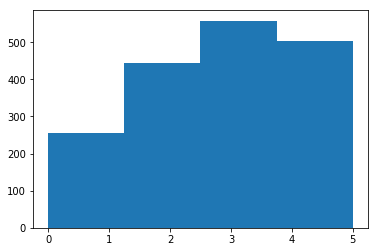

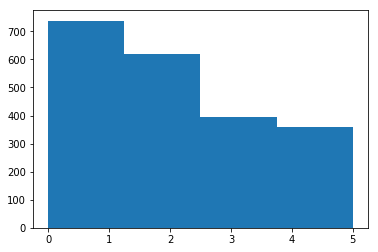

In [30]:
bins = np.linspace(0, 5, 5)
plt.hist(planet_periods, bins = bins)
plt.figure()
plt.hist(koi_feats["BLS_Period_1_0"], bins = bins)

In [31]:
harmonics_koi = np.empty(shape = [koi_feats.shape[0],2])
for i in range(koi_feats.shape[0]):
    results = brute(period_func, ranges=rranges, args=(koi_feats["BLS_Period_1_0"][i], planet_periods[i]), full_output=True, finish= None)
    #print results[0]
    harmonics_koi[i, :] =results[0]
    try:
        results[0].astype(int)
    except:
        print i
    #break
print harmonics_koi.shape

(4251, 2)


2872
3360
1379


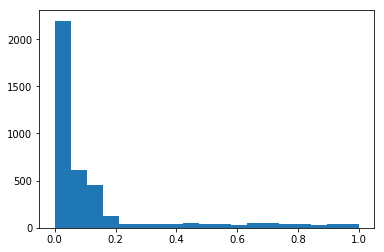

In [37]:
tol_koi = np.zeros(koi_feats.shape[0])
for i in range(koi_feats.shape[0]):
    tol_koi[i] = period_func( harmonics_koi[i], koi_feats["BLS_Period_1_0"][i], planet_periods[i])
    #break
#print type(periods_bls)
#print type(periods_inj)
#print harmonics[tol>2][0], np.array(periods_bls)[tol>2][0], periods_inj[tol>2][0], tol[tol>2][0]
print len(np.where(tol_koi>0.002)[0])
print len(np.unique(np.where(harmonics_koi>1)[0]))
print len(np.where(tol_koi<0.002)[0])
plt.hist(tol_koi, bins = np.linspace(0,1,20))
tot_vals_koi = np.hstack([harmonics_koi, tol_koi.reshape(harmonics_koi.shape[0], 1)]) 

In [76]:
print tot_vals_koi.shape
#np.savetxt("../Data/period_harmonics_4251_koi_signals_tol_5x5_ordered.txt", tot_vals_koi)

(4251, 3)


In [ ]:
period_